In [2]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# import data 
data = pd.read_csv(r"C:\Users\Maria Munir Stokes\Documents\DS Courses\CreditCardFraud\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


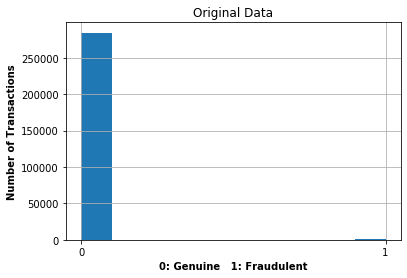

492
284315


In [4]:
# examining the data visually
data.Class.hist()
plt.xticks([0,1])
plt.xlabel('0: Genuine   1: Fraudulent', fontweight = 'bold')
plt.ylabel('Number of Transactions', fontweight = 'bold')
plt.title('Original Data')
plt.show()

#number of fradulent
number_fraud = len(data.loc[data.Class == 1])
number_genuine = len(data.loc[data.Class == 0])
print(number_fraud)
print(number_genuine)
# histogram shows the imbalance of data 

In [9]:
# splitting the independent variables from the dependent variable

x = data.iloc[:, 1:-2].values
y = data.iloc[:, -1].values
print(x.shape)
print(y)

(284807, 28)
[0 0 0 ... 0 0 0]


In [10]:
# separating out testing and training data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 425)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

227845
56962
227845
56962


[0 1]
[227470    375]


Text(0.5, 1.0, 'training data sample')

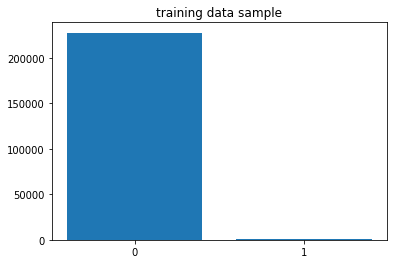

In [11]:
# examining the y_train
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print(unique_elements_train)
print(counts_elements_train)
plt.bar(unique_elements_train,counts_elements_train)
plt.xticks([0,1])
plt.title('training data sample')

In [12]:
# SMOTE Analysis to be used to sort out the imbalance
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
x_oversample, y_oversample = oversampler.fit_resample(x_train, y_train)
print(x_oversample)
print(y_oversample)



[[ 0.16652454 -2.71846886  0.51209753 ... -0.3105745  -0.05829824
   0.13210795]
 [-0.25665159  0.11073756  1.14252339 ... -0.15501635 -0.54714473
  -0.38049779]
 [-1.22919233 -0.03606693  2.06964876 ... -0.19531544  0.02542845
   0.06916923]
 ...
 [-0.95712674  0.06392748  0.51230522 ... -0.50106016 -0.01084702
   0.02287462]
 [-1.79978549  4.90798767 -5.92786053 ...  0.3189997   0.89392178
   0.5688507 ]
 [-4.641288   -3.09184916  0.09554319 ... -0.47967961  1.21835052
  -0.04979902]]
[0 0 0 ... 1 1 1]


[0 1]
[227470 227470]


Text(0.5, 1.0, 'SMOTE Sample')

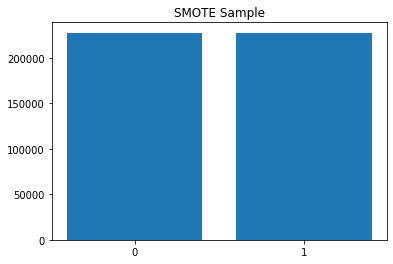

In [13]:
# the SMOTE classifier has enabled an equal balance of data
unique_elements, counts_elements = np.unique(y_oversample, return_counts=True)
print(unique_elements)
print(counts_elements)
plt.bar(unique_elements,counts_elements)
plt.xticks([0,1])
plt.title('SMOTE Sample')
# now the training set is balanced

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_oversample, y_oversample)
prediction = classifier.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,prediction)
print(cm)
score = accuracy_score(y_test,prediction)
print(score)

[[55271  1574]
 [    8   109]]
0.9722270987675995


In [22]:
55271+1574+8+109

56962

In [23]:
1574+8

1582

In [24]:
1582/56962

0.02777290123240055

0.9722270987675995